# These Commands are Prerequisite

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
# fix random seed for reproducibility
seed=7
np.random.seed(seed)

Using TensorFlow backend.


##### 0.1.1. Imorting Data

In [2]:
p_data = pd.io.parsers.read_csv("Prepared Data Anonymized.csv", delimiter=',', encoding='utf-8', low_memory=False) 
#encoding='latin-1'

##### 0.2.1. Preprocessing: Categorization

In [4]:
p_data.loc[(p_data['HbA1c'] <  5.7) , 'Status'] = 'Normal'
p_data.loc[(p_data['HbA1c'] >= 5.7) , 'Status'] = 'Risky'
p_data.head()
p_data['Status'].value_counts()

Risky     8737
Normal    4474
Name: Status, dtype: int64

In [ ]:
#Diabetes Dignostic Test
data['Diabetes'] = ''
#data.loc[(data['HbA1c'] <  5.7) & (data['FBS'] <   90), 'Diabetes'] = 'Healthy'
#data.loc[(data['HbA1c'] >= 6.5) & (data['FBS'] >= 126), 'Diabetes'] = 'Diabetic'
#data.loc[(data['Diabetes'] == ''), 'Diabetes'] = 'Prediabetic'

data.loc[(data['HbA1c'] <  5.7) , 'Diabetes'] = 'Normal'
data.loc[(data['HbA1c'] >= 5.7) , 'Diabetes'] = 'Risky'
#data.loc[(data['HbA1c'] >= 5.7) & (data['HbA1c'] < 6.5), 'Diabetes'] = 'Prediabetic'

data[['HbA1c','FBS', 'Diabetes']].head()
data[['HbA1c','FBS', 'Diabetes']].tail()

##### 0.1.2. Dropping Irrelevent Variables

In [5]:
# Deleting rows and columns (drop)
"""" 
To delete rows and columns from DataFrames, Pandas uses the “drop” function.
To delete a column, or multiple columns, use the name of the column(s), and specify the “axis” as 1. 
Alternatively, as in the example below, the ‘columns’ parameter has been added in Pandas which cuts 
out the need for ‘axis’. The drop function returns a new DataFrame, with the columns removed. 
To actually edit the original DataFrame, the “inplace” parameter can be set to True, and there is no returned value.

# Deleting columns
# Delete the "Area" column from the dataframe
data = data.drop("Area", axis=1)

# alternatively, delete columns using the columns parameter of drop
data = data.drop(columns="area")

# Delete the Area column from the dataframe in place
# Note that the original 'data' object is changed when inplace=True
data.drop("Area", axis=1, inplace=True). 

# Delete multiple columns from the dataframe
data = data.drop(["Y2001", "Y2002", "Y2003"], axis=1)
Rows can also be removed using the “drop” function, by specifying axis=0. Drop() removes rows based on “labels”,
rather than numeric indexing. To delete rows based on their numeric position / index, use iloc to reassign the 
dataframe values, as in the examples below.

The drop() function in Pandas be used to delete rows from a DataFrame, with the axis set to 0. As before, 
the inplace parameter can be used to alter DataFrames without reassignment.
# Delete the rows with labels 0,1,5
data = data.drop([0,1,2], axis=0)

# Delete the rows with label "Ireland"
# For label-based deletion, set the index first on the dataframe:
data = data.set_index("Area")
data = data.drop("Ireland", axis=0). # Delete all rows with label "Ireland"

# Delete the first five rows using iloc selector
data = data.iloc[5:,]
"""
#01
#data= p_data.drop(['Admittance.Date', 'Year'], axis=1)

#02
svars=list(['Status', 'Gender', 'Insurance', 'Family.Medicine', 
            'Old', 'Cholestrol', 'Creatinine', 'Glucose.2hpp', 'HDL.C', 'LDL.C', 'Triglyceride', 'UREA'])
data=p_data[svars]
data.head(5)


,Status,Gender,Insurance,Family.Medicine,Old,Cholestrol,Creatinine,Glucose.2hpp,HDL.C,LDL.C,Triglyceride,UREA
0,Risky,Female,Rural,No,49,170.0,0.89,164,55.0,77.0,108,20.0
1,Normal,Female,Rural,No,69,228.0,1.01,176,54.0,91.0,380,36.0
2,Risky,Female,Rural,No,67,261.0,0.75,338,96.0,100.0,127,20.0
3,Risky,Female,Rural,No,58,150.0,0.90,280,59.3,58.0,150,21.0
4,Risky,Female,Rural,No,42,220.0,0.85,243,61.0,95.0,256,30.0


##### 0.3. Exploring Data: Discriptive Statistics, Group by Status 

In [12]:

print(data['Diabetes'].value_counts())
from pandas import set_option
set_option('precision', 3)
data.describe().iloc[:,8:12]
#np.mean(data,axis=0)
data.iloc[:,10:20].apply(np.mean)
'''print(data.groupby('Diabetes').FBS.mean())
    print(data.groupby('Diabetes').HbA1c.mean())
    print(data.groupby('Diabetes').HbA1c.min())
    print(data.groupby('Diabetes').HbA1c.max())
    print(data.iloc[:,10:20].apply([np.mean,np.std, np.sum, min, max]))'''
#data.groupby('Diabetes').describe().iloc[:,8:12]
#data.groupby('Diabetes').describe().unstack().unstack(1).reindex(data.columns[10:15], level=0)
vars2=list(['FBS', 'HbA1c'])
data.groupby('Diabetes').describe().unstack().unstack(1).reindex(data.columns[[10,12,13,15,17,18,19,20,22,37,39]], level=0)
#data['Creatinine'].groupby('Diabetes').describe()

Diabetic       6160
Healthy        4474
Prediabetic    2577
Name: Diabetes, dtype: int64


count     mean      std    min     25%     50%  \
             Diabetes                                                       
Old          Diabetic     4990.0   53.597   12.194  18.00   47.00   55.00   
             Healthy      3800.0   46.081   14.864  18.00   34.00   46.00   
             Prediabetic  2227.0   52.472   13.575  18.00   44.00   54.00   
Cholestrol   Diabetic     4855.0  204.673   54.077  80.00  167.00  199.00   
             Healthy      3689.0  200.966   45.730  13.00  169.00  198.00   
             Prediabetic  2107.0  201.115   47.853  82.00  168.00  197.00   
Creatinine   Diabetic     3750.0    0.975    0.260   0.12    0.82    0.93   
             Healthy      2779.0    0.953    0.239   0.13    0.82    0.92   
             Prediabetic  1636.0    0.956    0.242   0.45    0.82    0.91   
FBS          Diabetic     5610.0  195.880   71.180  69.00  142.00  181.00   
             Healthy      4281.0  102.915   21.552  63.00   91.00   99.00   
             Prediabetic  2442.0  122.869   29.268  66.00  102.00  117.50   
Glucose.2hpp Diabetic     4555.0  319.487  114.131  70.00  236.00  307.00   
             Healthy      2234.0  150.269   60.362  65.00  110.00  133.00   
             Prediabetic  1756.0  198.812   76.677  66.00  142.00  183.00   
HDL.C        Diabetic     3980.0   49.751   12.407   7.00   41.70   48.00   
             Healthy      3073.0   51.050   12.901  18.00   42.00   50.00   
             Prediabetic  1748.0   50.469   12.512  17.00   42.00   49.00   
Hb           Diabetic     1442.0   14.265   31.559   4.40   11.80   12.80   
             Healthy      1151.0   12.863    3.672   7.90   11.80   12.70   
             Prediabetic   621.0   12.577    1.477   4.90   11.70   12.70   
HbA1c        Diabetic     6160.0    8.394    1.578   6.50    7.10    8.00   
             Healthy      4474.0    5.036    0.453   0.40    4.80    5.10   
             Prediabetic  2577.0    6.022    0.227   5.70    5.80    6.00   
LDL.C        Diabetic     4013.0  105.404   34.817  30.00   81.00  102.00   
             Healthy      3120.0  108.682   32.502  30.00   85.00  106.00   
             Prediabetic  1772.0  106.954   33.121  33.00   82.00  103.50   
Triglyceride Diabetic     4801.0  215.453  134.048  25.00  126.00  182.00   
             Healthy      3689.0  166.972  102.064  26.00   99.00  142.00   
             Prediabetic  2109.0  185.773  119.765  26.00  110.00  156.00   
UREA         Diabetic     3627.0   31.622   10.574   0.50   25.00   30.00   
             Healthy      2727.0   29.827    9.327   3.00   24.00   28.00   
             Prediabetic  1581.0   31.174    9.844   9.00   25.00   30.00   

                             75%     max  
             Diabetes                     
Old          Diabetic      62.00   93.00  
             Healthy       57.00   89.00  
             Prediabetic   61.00   92.00  
Cholestrol   Diabetic     236.00  677.00  
             Healthy      228.00  604.00  
             Prediabetic  232.00  458.00  
Creatinine   Diabetic       1.06    3.86  
             Healthy        1.04    4.03  
             Prediabetic    1.04    3.78  
FBS          Diabetic     239.00  600.00  
             Healthy      110.00  336.00  
             Prediabetic  137.00  350.00  
Glucose.2hpp Diabetic     390.00  796.00  
             Healthy      171.00  752.00  
             Prediabetic  243.00  691.00  
HDL.C        Diabetic      56.00  116.00  
             Healthy       58.00  124.00  
             Prediabetic   57.00  116.00  
Hb           Diabetic      13.80  901.00  
             Healthy       13.60  121.10  
             Prediabetic   13.40   17.00  
HbA1c        Diabetic       9.30   16.30  
             Healthy        5.40    5.62  
             Prediabetic    6.20    6.40  
LDL.C        Diabetic     126.00  287.00  
             Healthy      128.00  281.00  
             Prediabetic  127.00  246.00  
Triglyceride Diabetic     262.00  994.00  
             Healthy      205.00  962.00 

In [7]:
### On-Hot Encoding & Z-Score Normalization
columnsNamesArr = data.columns.values
listOfColumnNames = list(columnsNamesArr) 

#data['Insurance.Type'].unique()
data['Insurance.Type'].value_counts()

# using map to dummy encode
data['Insurance.TC'] = data['Insurance.Type'].copy()
cleanup_nums = {"Insurance.Type": {3:'Staff', 16:'Staff', 12:'Rural', 18:'Rural', 22:'Rural', 33:'Rural'
                                       , 2:'Social Security', 1:'Other', 14:'Other', 15:'Other'} }
data.replace(cleanup_nums, inplace=True)
data[['Insurance.Type','Insurance.TC']].head(10)


,Insurance.Type,Insurance.TC
0,Other,Other
1,Social Security,Social Security
2,Rural,Rural
3,Social Security,Social Security
4,Social Security,Social Security
5,Rural,Rural
6,Staff,Staff
7,Other,Other
8,Other,Other
9,Other,Other


### 2. Data Cleaning

#####        2.1. Dealing with Missings

In [ ]:
#----------missing------------ 
#df.apply(lambda x: x.value_counts(dropna=False)[np.nan]/x.size*100)
bank_df.isna().sum
bank_df.isnull().sum(axis = 0)
bank_df.isnull().any()

# Omitting the row with a rare level of gender variable "XNA"
df = bank_df[bank_df.CODE_GENDER != 'XNA'] 

#dataset = dataframe.values
#type(dataset)
#data=pd.DataFrame(dataset)
df.info()
df.isnull().sum(axis = 0)
df.shape

#------------
df.describe
df.columns

#F_counts = X.groupby('CODE_GENDER_F').size()
pd.isnull(df).any(1).nonzero()[0]


### 3. Feature Engineering

######      3.1 One-Hot Encoding

In [6]:
''''# using map to dummy encode
Status_map={'Healthy':0,'Prediabetic':1,'Diabetic':2} #, np.NAN:-1
data['Encoded_Diabetes'] = data.Diabetes.map(Status_map)
print(data.tail())'''

"""
data["Insurance.Type"] = data["Insurance.Type"].astype('category')
data.dtypes
data['Insurance'] = data['Insurance.Type'].cat.codes #Encoding with Accssor without defining code for categories
data[['Insurance.Type','Insurance.TC', 'Insurance']].head(10)
pd.get_dummies(data, columns=["Insurance"]).head(10) 
"""

## using get_dummies to one hot encode
encoded_data = pd.get_dummies(data, columns=['Status','Gender','Insurance','Family.Medicine'])
#encoded_data.columns.values
OH_vars=list([
 'Status_Normal',
   'Status_Risky',
 'Gender_Female',
   'Gender_Male',
 'Insurance_Other',
   'Insurance_Rural',
     'Insurance_Social Security',
       'Insurance_Staff',
 'Family.Medicine_No',
   'Family.Medicine_Yes'])
encoded_data = encoded_data[OH_vars]
encoded_data.head(5)

,Status_Normal,Status_Risky,Gender_Female,Gender_Male,Insurance_Other,Insurance_Rural,Insurance_Social Security,Insurance_Staff,Family.Medicine_No,Family.Medicine_Yes
0,0,1,1,0,0,1,0,0,1,0
1,1,0,1,0,0,1,0,0,1,0
2,0,1,1,0,0,1,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1,0


##### 3.2. Normalizing Quantitative Data

In [7]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions #determining digits

# Z-Score Normalization
Zs_vars = list([
    'Old',
    'Cholestrol',
    'Creatinine',
    'Glucose.2hpp',
    'HDL.C',
    'LDL.C',
    'Triglyceride',
    'UREA'])

scaler = Normalizer().fit(p_data[Zs_vars])
normalizedX = scaler.transform(p_data[Zs_vars])
normalized  = pd.DataFrame(normalizedX)
normalized.columns=[Zs_vars]

# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.174 0.604 0.003 0.583 0.195 0.274 0.384 0.071]
 [0.14  0.461 0.002 0.356 0.109 0.184 0.768 0.073]
 [0.142 0.553 0.002 0.716 0.203 0.212 0.269 0.042]
 [0.158 0.41  0.002 0.765 0.162 0.158 0.41  0.057]
 [0.097 0.507 0.002 0.56  0.141 0.219 0.59  0.069]]


##### 3.3. Joinning Two Data Frames

In [8]:
edata = encoded_data.join(normalized) # Joining Them
edata.columns=[OH_vars + Zs_vars] # Naming Columns
print(edata.shape)
edata.head(5)

(13211, 18)


,Status_Normal,Status_Risky,Gender_Female,Gender_Male,Insurance_Other,Insurance_Rural,Insurance_Social Security,Insurance_Staff,Family.Medicine_No,Family.Medicine_Yes,Old,Cholestrol,Creatinine,Glucose.2hpp,HDL.C,LDL.C,Triglyceride,UREA
0,0,1,1,0,0,1,0,0,1,0,0.174097,0.604008,0.003162,0.582691,0.195415,0.273580,0.383723,0.071060
1,1,0,1,0,0,1,0,0,1,0,0.139511,0.460992,0.002042,0.355853,0.109182,0.183992,0.768320,0.072788
2,0,1,1,0,0,1,0,0,1,0,0.142008,0.553195,0.001590,0.716398,0.203474,0.211952,0.269179,0.042390
3,0,1,1,0,0,1,0,0,1,0,0.158393,0.409637,0.002458,0.764656,0.161943,0.158393,0.409637,0.057349
4,0,1,1,0,0,1,0,0,1,0,0.096764,0.506859,0.001958,0.559849,0.140538,0.218871,0.589800,0.069117


In [9]:
#Saving Prepared Data by Python
import csv
edata.to_csv('edata_Binary_Class.csv', index=False, header=True)

## 4. Modelling

##### 4.1. Multilayers Perceptron Neural Networks (MLP)

In [87]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import random

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load Engineered dataset (edata)
data = pd.read_csv("edata_Binary_Class.csv", delimiter=',')

# split into input (X) and output (Y) variables
#XP = data.iloc[:,[5,9,42,48,52,67,69]].values
X = data.iloc[:,2:].values
Y = data.iloc[:,:2].values
#Y = to_categorical(target, dtype='float32')

#------------ splitting train and test ------------
from sklearn.model_selection import train_test_split

# create training and testing var
#(train_data, train_targets), (test_data, test_targets) = daset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

#-------------------- Checkpointer ----------------
# Saving the best model's weights
from keras.callbacks import ModelCheckpoint
''' saves the model weights after each epoch if the validation loss decreased '''
checkpointer = ModelCheckpoint(filepath='weights_BC.hdf5', verbose=1, save_best_only=True)

# Saving Model's training time
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

#-------------------- Creating Model -------------------------
modelMLP = Sequential()
modelMLP.add(Dense(X.shape[1]+3, input_dim= X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus'))
modelMLP.add(Dense(2, kernel_initializer= 'uniform' , activation= 'softmax'))
modelMLP.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy']) 
time_callback = TimeHistory()

#fitting above model
MLPhistory_BC= modelMLP.fit(X,Y, validation_data= (X_test,Y_test), epochs=5, batch_size=10, callbacks=[checkpointer, time_callback])

#Training Time
print("Total training time is: ", np.sum(time_callback.times))

Train on 13211 samples, validate on 2643 samples
Epoch 1/5
13211/13211 [==============================] - 6s 478us/step - loss: 0.5915 - acc: 0.6809 - val_loss: 0.4965 - val_acc: 0.7650

Epoch 00001: val_loss improved from inf to 0.49649, saving model to weights_BC.hdf5
Epoch 2/5
13211/13211 [==============================] - 4s 310us/step - loss: 0.4706 - acc: 0.7751 - val_loss: 0.4489 - val_acc: 0.7885

Epoch 00002: val_loss improved from 0.49649 to 0.44889, saving model to weights_BC.hdf5
Epoch 3/5
13211/13211 [==============================] - 5s 346us/step - loss: 0.4581 - acc: 0.7788 - val_loss: 0.4463 - val_acc: 0.7919

Epoch 00003: val_loss improved from 0.44889 to 0.44632, saving model to weights_BC.hdf5
Epoch 4/5
13211/13211 [==============================] - 4s 301us/step - loss: 0.4566 - acc: 0.7822 - val_loss: 0.4475 - val_acc: 0.7896

Epoch 00004: val_loss did not improve from 0.44632
Epoch 5/5
13211/13211 [==============================] - 4s 318us/step - loss: 0.4563 - 

##### 4.2. Saving and Loading the model

In [30]:
#Saving Model Output
MLP_Results_BC = pd.DataFrame(MLPhistory_BC.history)
MLP_Results_BC['Epochs'] = MLPhistory_BC.epoch
#Saving Prepared Data by Python
import csv
MLP_Results_BC.to_csv('MLPNNs_Results_BC.csv', index=False, header=True)
MLP_Results_BC.head(5)

,val_loss,val_acc,loss,acc,Epochs
0,0.496497,0.765040,0.591549,0.680872,0
1,0.448893,0.788498,0.470611,0.775112,1
2,0.446320,0.791903,0.458140,0.778821,2
3,0.447532,0.789633,0.456581,0.782151,3
4,0.447690,0.786984,0.456312,0.782908,4


In [7]:
# Saving MLP Model on jason file
#...pip install h5py
from keras.models import model_from_json
import os

# Serialize model to JSON
model_json = modelMLP.to_json()
with open("modelMLP_BC.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelMLP.save_weights("modelMLP_BC.h5")
print("Saved model to disk")

Saved model to disk


In [8]:
"""# later...
from keras.models import model_from_json
import os
# load json and create model
json_file = open("modelMLP.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelMLP.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model. compile(loss= binary_crossentropy , optimizer= rmsprop , metrics=[ accuracy ])
score = loaded_model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100)
"""

Loaded model from disk


'\n# evaluate loaded model on test data\nloaded_model. compile(loss= binary_crossentropy , optimizer= rmsprop , metrics=[ accuracy ])\nscore = loaded_model.evaluate(X, Y, verbose=0)\nprint "%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100)\n'

## 5. Model Evaluation

##### 5.1. Saving the Best Model with Checkpointer

In [40]:
# Saving the best model's weights
from keras.callbacks import ModelCheckpoint

'''
saves the model weights after each epoch if the validation loss decreased
'''
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

# Saving Model's training time
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
        
modelMLPtest = Sequential()
modelMLPtest.add(Dense(X.shape[1]+3, input_dim= X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus' ))
modelMLPtest.add(Dense(3, kernel_initializer= 'uniform' , activation= 'softmax' ))
modelMLPtest.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=[ 'accuracy' ])

time_callback = TimeHistory()
MLPtest= modelMLPtest.fit(X,Y, validation_data= (X_test,Y_test), epochs=3, batch_size=10, callbacks=[checkpointer,time_callback])

#Training Time
print(np.sum(time_callback.times))


Train on 13211 samples, validate on 2643 samples
Epoch 1/3
13211/13211 [==============================] - 2s 138us/step - loss: 0.5709 - acc: 0.7177 - val_loss: 0.4937 - val_acc: 0.7847

Epoch 00001: val_loss improved from inf to 0.49366, saving model to weights.hdf5
Epoch 2/3
13211/13211 [==============================] - 1s 105us/step - loss: 0.4703 - acc: 0.7927 - val_loss: 0.4550 - val_acc: 0.7988

Epoch 00002: val_loss improved from 0.49366 to 0.45499, saving model to weights.hdf5
Epoch 3/3
13211/13211 [==============================] - 1s 104us/step - loss: 0.4601 - acc: 0.7961 - val_loss: 0.4518 - val_acc: 0.7992

Epoch 00003: val_loss improved from 0.45499 to 0.45182, saving model to weights.hdf5
5.033709287643433


##### 5.2. Permutation Importance

In [53]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def nns():
    modelMLPtest = Sequential()
    modelMLPtest.add(Dense(X.shape[1]+3, input_dim= X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus' ))
    modelMLPtest.add(Dense(3, kernel_initializer= 'uniform' , activation= 'softmax' ))
    modelMLPtest.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=[ 'accuracy' ])
    return modelMLPtest

my_model = KerasClassifier(build_fn=nns, epochs=3, batch_size=5, verbose=0)    
my_model.fit(X_train, Y_train)

perm = PermutationImportance(my_model, random_state=1).fit(X_train, Y_train)
Features = data.iloc[:,3:].columns.values
eli5.show_weights(perm, feature_names = Features.tolist())

Weight,Feature
0.0675 ± 0.0026,Glucose.2hpp
0.0115 ± 0.0028,Cholestrol
0.0048 ± 0.0008,HDL.C
0.0048 ± 0.0007,LDL.C
0.0025 ± 0.0013,UREA
0.0014 ± 0.0003,Old
0.0013 ± 0.0012,Triglyceride
0.0008 ± 0.0004,Insurance_Social Security
0.0007 ± 0.0006,Gender_Male
0.0002 ± 0.0002,Creatinine


##### 5.3. Validation Accuracy and Loss through Training the Model

<IPython.core.display.Javascript object>


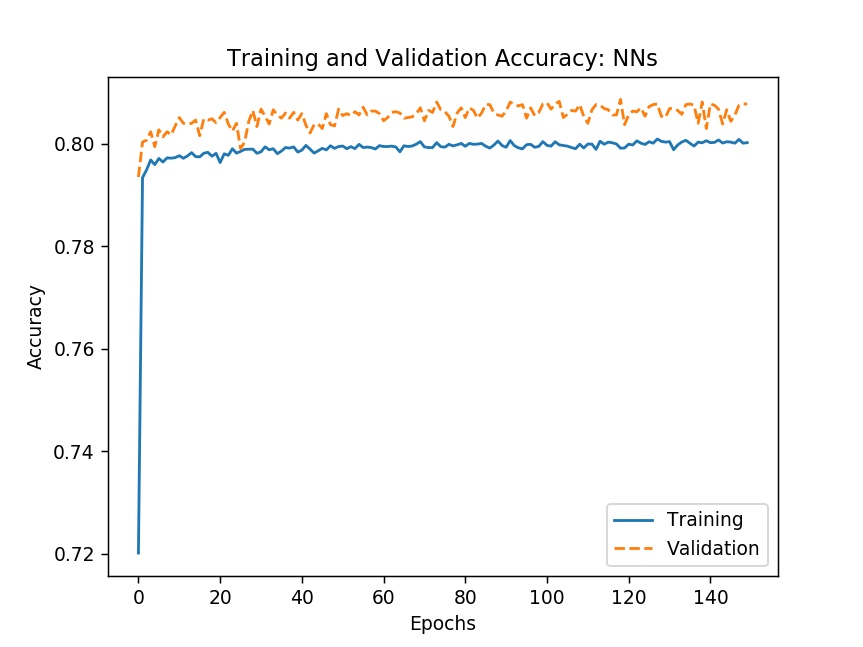

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(MLPhistory.epoch, MLPhistory.history['acc'],  label='Training')
plt.plot(MLPhistory.epoch, MLPhistory.history['val_acc'], label='Validation', linestyle='--')
plt.title('Training and Validation Accuracy: NNs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
#plt.savefig('Figure_Val ACC_MLPmodel.png', dpi= 900)

<IPython.core.display.Javascript object>


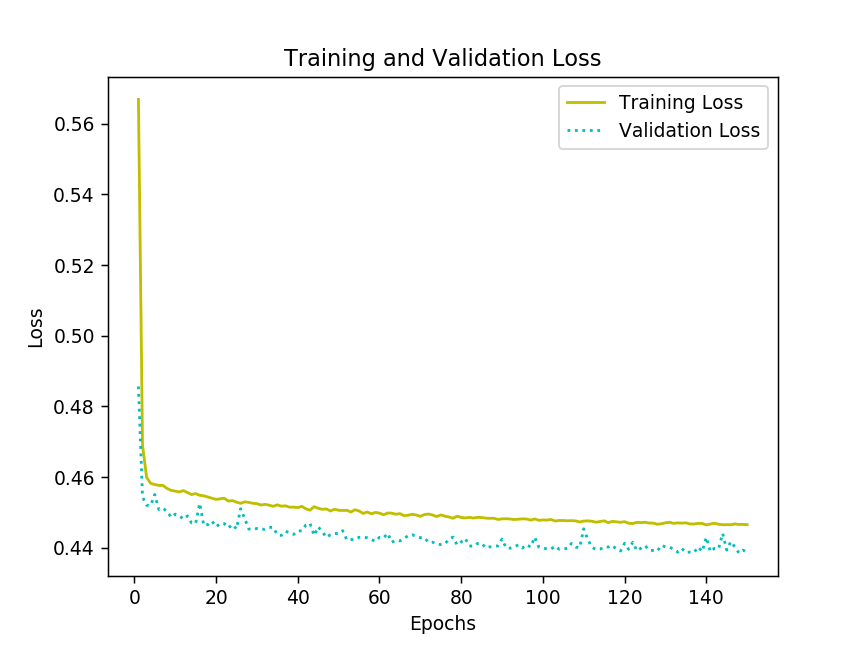

In [14]:
#plt.clf()
%matplotlib notebook
loss = MLPhistory.history['loss']
val_loss = MLPhistory.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label= 'Training Loss')
plt.plot(epochs, val_loss, 'c', label= 'Validation Loss', linestyle=':')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plt.savefig('Figure_Val Loss_MLPmodel.png', dpi= 900)

<IPython.core.display.Javascript object>


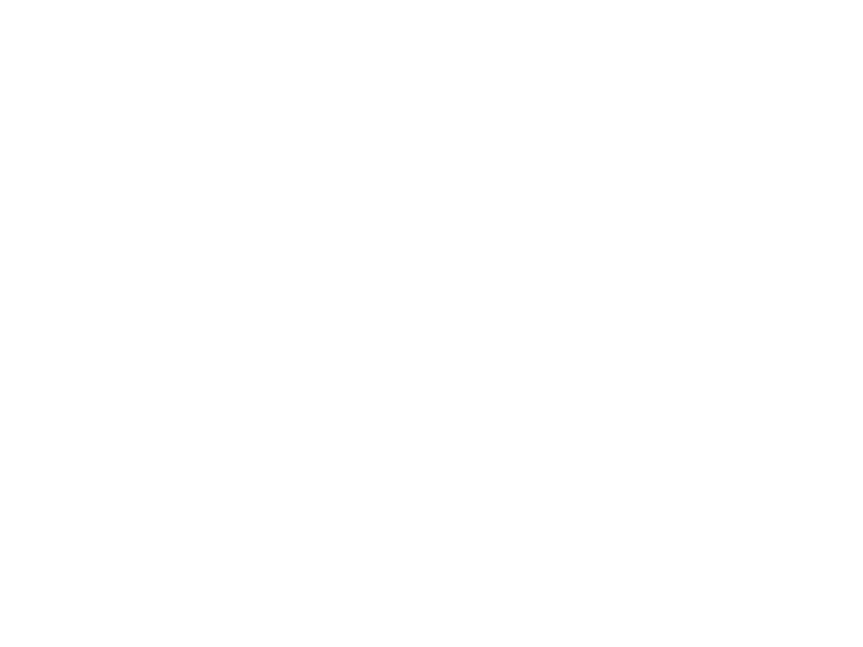

In [23]:
%matplotlib notebook
Results = pd.read_csv("Results.csv", delimiter=',')
plt.plot(MLPhistory.epoch, Results['deep_val_acc'], label='Deep NNs')
plt.plot(MLPhistory.epoch, Results['MLP_val_acc'],  label='MultiLayers NNs', linestyle='--')
plt.title('Validation Accuracy: MultiLayers NNs vs Deep NNs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
#plt.savefig('Figure_Val ACC_MLPmodel.png', dpi= 900)

##### 5.4. Confusion Matrix of MLP

In [89]:
Y_actual    = [np.argmax(y, axis=None, out=None) for y in Y_test]
Y_predicted = modelMLP.predict_classes(X_test)
from pandas_ml import ConfusionMatrix
MLPcm = ConfusionMatrix(Y_actual,Y_predicted)
print(MLPcm)
MLPcm.print_stats()

Predicted  False  True  __all__
Actual                         
False        534   359      893
True         204  1546     1750
__all__      738  1905     2643
population: 2643
P: 1750
N: 893
PositiveTest: 1905
NegativeTest: 738
TP: 1546
TN: 534
FP: 359
FN: 204
TPR: 0.8834285714285715
TNR: 0.5979843225083986
PPV: 0.8115485564304462
NPV: 0.7235772357723578
FPR: 0.40201567749160133
FDR: 0.18845144356955382
FNR: 0.11657142857142858
ACC: 0.7869844873250095
F1_score: 0.8459644322845418
MCC: 0.5075593130311624
informedness: 0.48141289393696995
markedness: 0.5351257922028041
prevalence: 0.6621263715474839
LRP: 2.1974978113808197
LRN: 0.19494060995184592
DOR: 11.272652793708012
FOR: 0.2764227642276423


In [90]:
from sklearn.metrics import classification_report
report = classification_report(Y_actual,Y_predicted)
print(report)

             precision    recall  f1-score   support

          0       0.72      0.60      0.65       893
          1       0.81      0.88      0.85      1750

avg / total       0.78      0.79      0.78      2643



##### 5.4.2 Confusion Matrix Plot

In [25]:
import matplotlib.pyplot as plt

# defining function to plot confusion matrix
def plot_confusion_matrix(df_confusion, names, title='Confusion matrix', cmap=plt.cm.Blues): #plt.cm.gray_r
    plt.imshow(df_confusion, interpolation='nearest', cmap=cmap) # plt.imshow=plt.matshow(df_confusion, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names)) #df_confusion.columns=names
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names) #names=df_confusion.index
    plt.tight_layout()
    plt.ylabel('True Label') #or df_confusion.index.name
    plt.xlabel('Predicted Lable') #or df_confusion.columns.name

Confusion Matrix without Normalization
[[ 747    4  142]
 [ 272    6  228]
 [ 143    2 1099]]


<IPython.core.display.Javascript object>


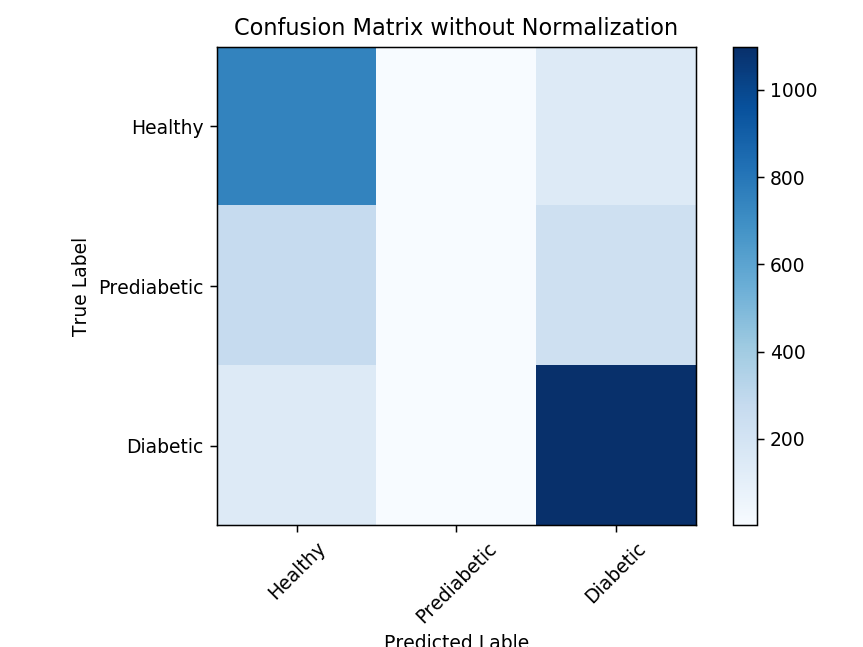

In [26]:
# Plotting Confusion Matrix without Normalization
plt.clf()
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(Y_actual, Y_predicted)
Status= list(['Healthy', 'Prediabetic', 'Diabetic'])
print("Confusion Matrix without Normalization")
print(confmat)
plt.figure()
plot_confusion_matrix(confmat, Status, title= "Confusion Matrix without Normalization")
plt.show()
#plt.savefig('Confusion Matrix without Normalization.png', dpi= 900)

In [33]:
## Plotting Normalized Confusion Matrix
#plt.clf()
#Normalize the confusion matrix by row (# of samples in each class)
confmat_normalized = confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
print("Normalized Confusion Matrix")
print(confmat_normalized)
plt.figure()
plot_confusion_matrix(confmat_normalized, Status, title= "Normalized Confusion Matrix")
plt.show()
#plt.savefig('Confusion Matrix with Normalization.png', dpi= 900)

NameError: name 'confmat' is not defined

<IPython.core.display.Javascript object>


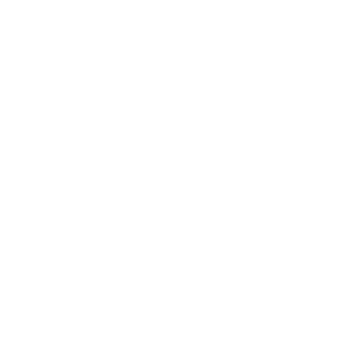

TypeError: 'LabeledConfusionMatrix' object is not subscriptable

In [174]:
# Reading a confusion matrix: ML with Python, Vahid Mirjalali, page 204

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

"""
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confmat)
plt.show()
"""
#sns.heatmap(confmat, annot=True, fmt='.5g')

<IPython.core.display.Javascript object>


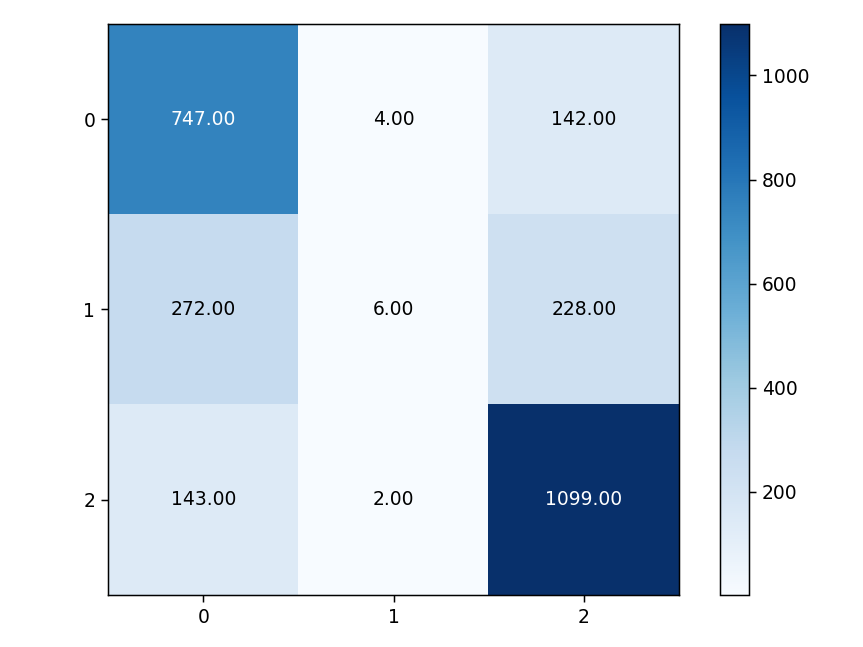

In [209]:
def plot_confusion_matrix_sec(df_confusion, names, title='Confusion matrix', cmap=plt.cm.Blues): #plt.cm.gray_r
    plt.imshow(df_confusion, interpolation='nearest', cmap=cmap) # plt.imshow=plt.matshow(df_confusion, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names)) #df_confusion.columns=names
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names) #names=df_confusion.index
    plt.tight_layout()
    plt.ylabel('True Label') #or df_confusion.index.name
    plt.xlabel('Predicted Lable') #or df_confusion.columns.name
    fig, ax = plt.subplots()
    im = ax.imshow(confmat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(confmat.shape[1]),
           yticks=np.arange(confmat.shape[0]))
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' #if normalize else 'd'
    thresh = confmat.max() / 2.
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(j, i, format(confmat[i, j], fmt), ha="center", va="center",
                    color="white" if confmat[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
plot_confusion_matrix_sec(confmat, Status, title= "Confusion Matrix")
plt.show()
#plt.savefig('Confusion Matrix - with Figures.png', dpi= 900)

##### 5.5. ROC Curve

<IPython.core.display.Javascript object>


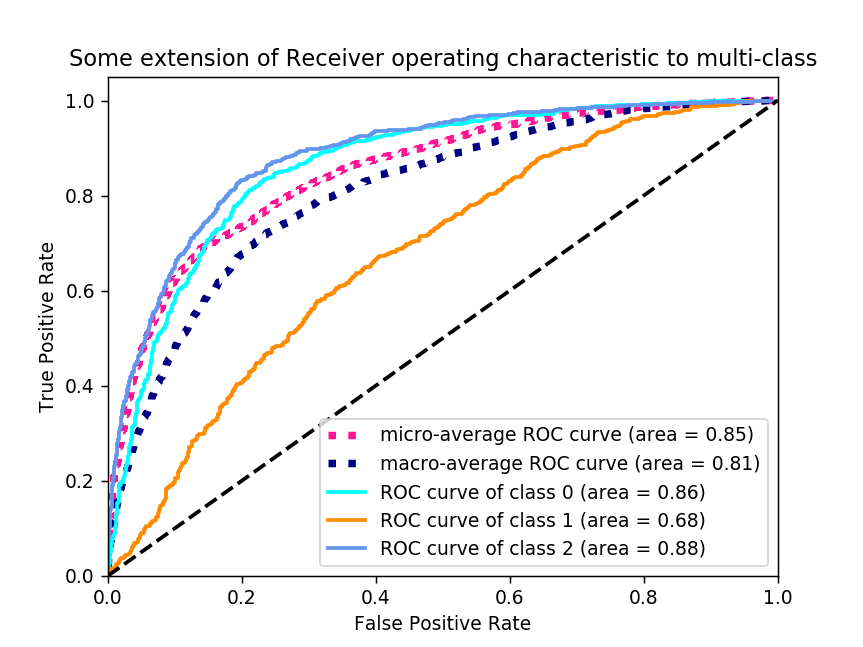

' # Zoom in view of the upper left corner.\nplt.figure(2)\nplt.xlim(0, 0.2)\nplt.ylim(0.8, 1)\nplt.plot(fpr["micro"], tpr["micro"],\n         label=\'micro-average ROC curve (area = {0:0.2f})\'\n               \'\'.format(roc_auc["micro"]),\n         color=\'deeppink\', linestyle=\':\', linewidth=4)\n\nplt.plot(fpr["macro"], tpr["macro"],\n         label=\'macro-average ROC curve (area = {0:0.2f})\'\n               \'\'.format(roc_auc["macro"]),\n         color=\'navy\', linestyle=\':\', linewidth=4)\n\ncolors = cycle([\'aqua\', \'darkorange\', \'cornflowerblue\'])\nfor i, color in zip(range(n_classes), colors):\n    plt.plot(fpr[i], tpr[i], color=color, lw=lw,\n             label=\'ROC curve of class {0} (area = {1:0.2f})\'\n             \'\'.format(i, roc_auc[i]))\n\nplt.plot([0, 1], [0, 1], \'k--\', lw=lw)\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Some extension of Receiver operating characteristic to multi-class\')\nplt.legend(loc="lower 

In [48]:
%matplotlib notebook
plt.clf()
#ROC curves along with AUC values
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
data = pd.read_csv("edata.csv", delimiter=',')
X = data.iloc[:,3:].values
Y = data.iloc[:,:3].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)
y_test= Y_test
n_classes = Y.shape[1]
y_pred = modelMLP.predict(X_test)#.ravel()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
#plt.savefig('ROC Curve for MLPmodel.png', dpi= 900)

""" # Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
"""


In [40]:
plt.clf()

In [58]:
# Loading Deep NNs Model
from keras.models import model_from_json
import os
# load json and create model
json_file = open("modelDNNs.json", 'r')
loaded_Deepmodel_json = json_file.read()
json_file.close()
loaded_Deepmodel = model_from_json(loaded_Deepmodel_json)
# load weights into new model
loaded_Deepmodel.load_weights("weights.best.hdf5")
print("Loaded Deepmodel from disk")
# Compile model (required to make predictions)
loaded_Deepmodel.compile(loss= 'binary_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ])
# evaluate loaded model on test data
score = loaded_Deepmodel.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_Deepmodel.metrics_names[1], score[1]*100))
y_deeppred = loaded_Deepmodel.predict(X_test)#.ravel()

Loaded Deepmodel from disk
acc: 80.86%


##### 5.6.2 ROC Curve for Comparing MLP NNs vs Deep NNs

In [49]:
%matplotlib notebook
# Compute ROC curve and ROC area for each class

lw=2
n_classes = Y.shape[1]
fpr_deep = dict()
tpr_deep = dict()
roc_auc_deep = dict()
for i in range(n_classes):
    fpr_deep[i], tpr_deep[i], thresholds = roc_curve(y_test[:, i], y_deeppred[:, i])
    roc_auc_deep[i] = auc(fpr_deep[i], tpr_deep[i])
# Compute micro-average ROC curve and ROC area
fpr_deep["micro"], tpr_deep["micro"], _ = roc_curve(y_test.ravel(), y_deeppred.ravel())
roc_auc_deep["micro"] = auc(fpr_deep["micro"], tpr_deep["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr_deep = np.unique(np.concatenate([fpr_deep[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_deep = np.zeros_like(all_fpr_deep)
for i in range(n_classes):
    mean_tpr_deep += interp(all_fpr_deep, fpr_deep[i], tpr_deep[i])

# Finally average it and compute AUC
mean_tpr_deep /= n_classes

fpr_deep["macro"] = all_fpr_deep
tpr_deep["macro"] = mean_tpr_deep
roc_auc_deep["macro"] = auc(fpr_deep["macro"], tpr_deep["macro"])


<IPython.core.display.Javascript object>


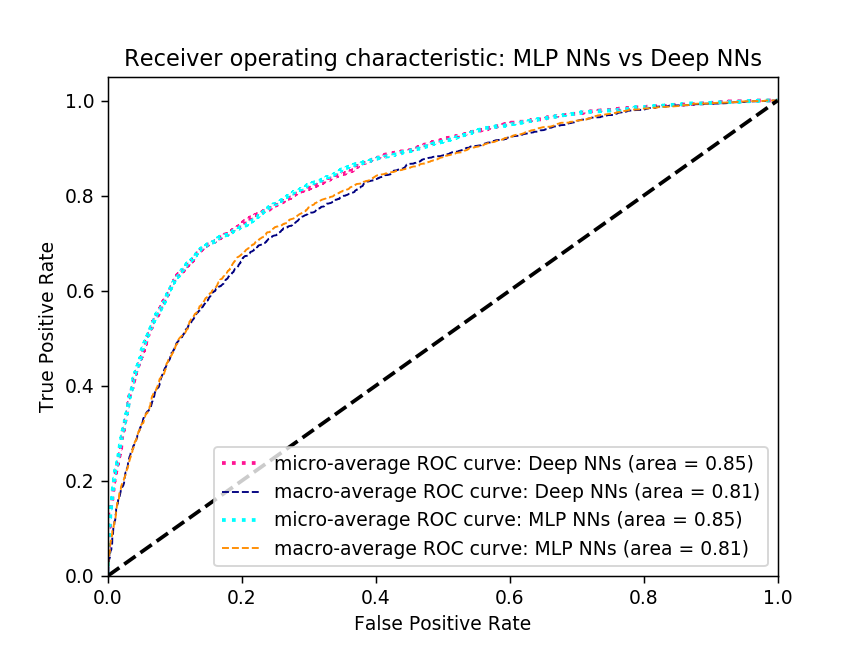

In [57]:

# Plot all ROC curves for Deep NNs
plt.figure(1)
plt.plot(fpr_deep["micro"], tpr_deep["micro"],
         label='micro-average ROC curve: Deep NNs (area = {0:0.2f})'
               ''.format(roc_auc_deep["micro"]),
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr_deep["macro"], tpr_deep["macro"],
         label='macro-average ROC curve: Deep NNs (area = {0:0.2f})'
               ''.format(roc_auc_deep["macro"]),
         color='navy', linestyle='--', linewidth=1)


plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve: MLP NNs (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='aqua', linestyle=':', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve: MLP NNs (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='darkorange',linestyle='--', linewidth=1)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: MLP NNs vs Deep NNs')
plt.legend(loc="lower right")
plt.show()
#plt.savefig('ROC Curve_MLP NNs vs Deep NNs.png', dpi= 900)

### 6. Imputed Data with 0

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import random

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load Engineered dataset (edata)
data = pd.read_csv("edata-nonimputed.csv", delimiter=',')

# split into input (X) and output (Y) variables

X = data.iloc[:,3:].values
Y = data.iloc[:,:3].values

#------------ splitting train and test ------------
from sklearn.model_selection import train_test_split

# create training and testing var
#(train_data, train_targets), (test_data, test_targets) = daset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

#-------------------- Checkpointer ----------------
# Saving the best model's weights
from keras.callbacks import ModelCheckpoint
''' saves the model weights after each epoch if the validation loss decreased '''
checkpointer = ModelCheckpoint(filepath='weights-nonimp.hdf5', verbose=1, save_best_only=True)

# Saving Model's training time
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

#-------------------- Creating Model -------------------------
modelMLP = Sequential()
modelMLP.add(Dense(X.shape[1]+3, input_dim= X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus'))
modelMLP.add(Dense(3, kernel_initializer= 'uniform' , activation= 'softmax'))
modelMLP.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy']) 
time_callback = TimeHistory()

#fitting above model
MLPhistory= modelMLP.fit(X,Y, validation_data= (X_test,Y_test), epochs=5, batch_size=10, callbacks=[checkpointer, time_callback])

#Training Time
print("Total training time is: ", np.sum(time_callback.times))

Train on 13211 samples, validate on 2643 samples
Epoch 1/5
13211/13211 [==============================] - 2s 128us/step - loss: 0.5122 - acc: 0.7476 - val_loss: 0.4924 - val_acc: 0.7579

Epoch 00001: val_loss improved from inf to 0.49243, saving model to weights-nonimp.hdf5
Epoch 2/5
13211/13211 [==============================] - 1s 105us/step - loss: 0.5015 - acc: 0.7574 - val_loss: 0.4894 - val_acc: 0.7594

Epoch 00002: val_loss improved from 0.49243 to 0.48943, saving model to weights-nonimp.hdf5
Epoch 3/5
13211/13211 [==============================] - 1s 111us/step - loss: 0.5000 - acc: 0.7585 - val_loss: 0.4870 - val_acc: 0.7600

Epoch 00003: val_loss improved from 0.48943 to 0.48697, saving model to weights-nonimp.hdf5
Epoch 4/5
13211/13211 [==============================] - 1s 110us/step - loss: 0.4989 - acc: 0.7600 - val_loss: 0.4869 - val_acc: 0.7618

Epoch 00004: val_loss improved from 0.48697 to 0.48690, saving model to weights-nonimp.hdf5
Epoch 5/5
13211/13211 [============

# First Deep NNs

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import random
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
# load Engineered dataset (edata)
data = pd.read_csv("edata.csv", delimiter=',')

# split into input (X) and output (Y) variables
X = data.iloc[:,2:].values
Y = data.iloc[:,:2].values

from sklearn.model_selection import train_test_split
# create training and testing var
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [20]:

"""
#--------------------------------------------------
def deepNNs():
    modelDNNs = Sequential()
    modelDNNs.add(Dense(35, input_dim=30, kernel_initializer= 'uniform' , activation= 'relu'))
    modelDNNs.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu'))
    modelDNNs.add(Dense(3, kernel_initializer= 'uniform' , activation= 'sigmoid'))
    modelDNNs.add(Dense(3, kernel_initializer= 'uniform' , activation= 'softmax'))
    modelDNNs.compile(optimizer= 'adam', loss= 'categorical_crossentropy' , metrics=['accuracy'])
    return deepNNs

deep_estimator = KerasClassifier(build_fn = deepNNs , epochs=3, batch_size=5, verbose=0)
#--------------------------------------------------
"""
modelDNNs = Sequential()
modelDNNs.add(Dense(X.shape[1]+3, input_dim=X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus'))
modelDNNs.add(Dense(12,kernel_initializer= 'uniform' , activation= 'relu'))
modelDNNs.add(Dense(7, kernel_initializer= 'uniform' , activation= 'sigmoid'))
modelDNNs.add(Dense(2, kernel_initializer= 'uniform' , activation= 'softmax'))
modelDNNs.compile(optimizer= 'adam', loss= 'binary_crossentropy' , metrics=['accuracy'])

# checkpoint: Saving the best model's weights
from keras.callbacks import ModelCheckpoint

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_acc', verbose=1, save_best_only=True, mode= 'max')

# Saving Model's training time
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()
callbacks_list = [checkpoint, time_callback]

# Fit the model
deephistory = modelDNNs.fit(X, Y, validation_data =(X_test, Y_test), epochs=5, batch_size=10, verbose=0, callbacks=callbacks_list)

#Training Time
print(" ")
print("Total Training Time is: ")
print(np.sum(time_callback.times))


Epoch 00001: val_acc improved from -inf to 0.70463, saving model to weights.best.hdf5

Epoch 00002: val_acc improved from 0.70463 to 0.75697, saving model to weights.best.hdf5

Epoch 00003: val_acc did not improve from 0.75697

Epoch 00004: val_acc improved from 0.75697 to 0.80111, saving model to weights.best.hdf5

Epoch 00005: val_acc did not improve from 0.80111

Epoch 00006: val_acc improved from 0.80111 to 0.80149, saving model to weights.best.hdf5

Epoch 00007: val_acc did not improve from 0.80149

Epoch 00008: val_acc improved from 0.80149 to 0.80199, saving model to weights.best.hdf5

Epoch 00009: val_acc improved from 0.80199 to 0.80388, saving model to weights.best.hdf5

Epoch 00010: val_acc did not improve from 0.80388

Epoch 00011: val_acc improved from 0.80388 to 0.80414, saving model to weights.best.hdf5

Epoch 00012: val_acc did not improve from 0.80414

Epoch 00013: val_acc improved from 0.80414 to 0.80527, saving model to weights.best.hdf5

Epoch 00014: val_acc did no

In [22]:
# Saving Deep Model on jason file
from keras.models import model_from_json
import os

# Serialize model to JSON
model_json = modelDNNs.to_json()
with open("modelDNNs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelDNNs.save_weights("modelDNNs.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)

In [54]:
#Saving Model Output
Deep_Results = pd.DataFrame(deephistory.history)
deephistory.epoch
Deep_Results['Epoch'] = deephistory.epoch
#Saving Prepared Data by Python
import csv
Deep_Results.to_csv('DeepNNs_Results.csv', index=False, header=True)
Deep_Results.head(5)

,val_loss,val_acc,loss,acc,Epoch
0,0.602582,0.704629,0.608469,0.670729,0
1,0.540766,0.756968,0.587118,0.722958,1
2,0.477779,0.756842,0.505369,0.754725,2
3,0.462231,0.801110,0.473621,0.795095,3
4,0.458813,0.800479,0.465198,0.795751,4


<IPython.core.display.Javascript object>


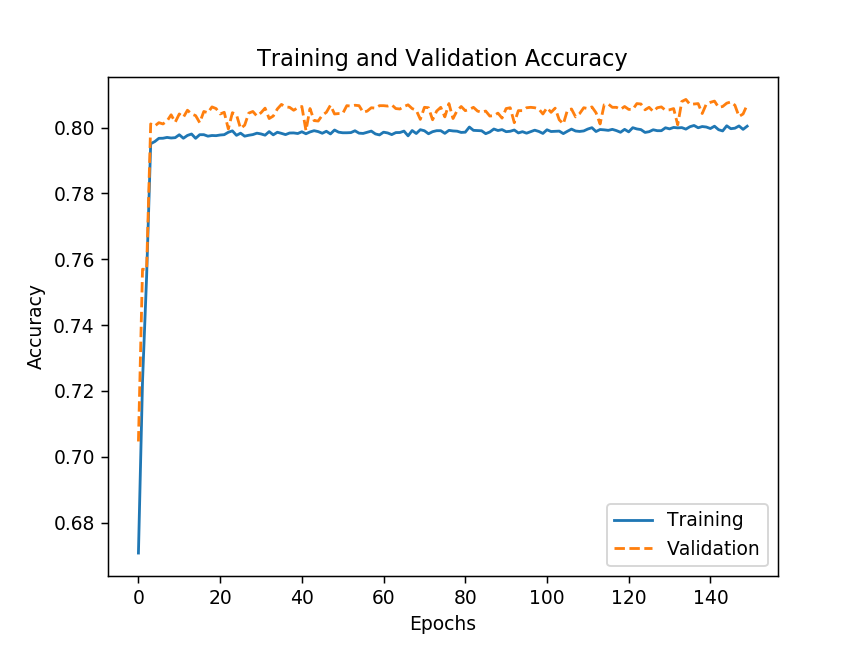

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(deephistory.epoch, deephistory.history['acc'],  label='Training')
plt.plot(deephistory.epoch, deephistory.history['val_acc'], label='Validation', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
#plt.savefig('Figure_Val ACC - DeepNNs.png', dpi= 900)

<IPython.core.display.Javascript object>


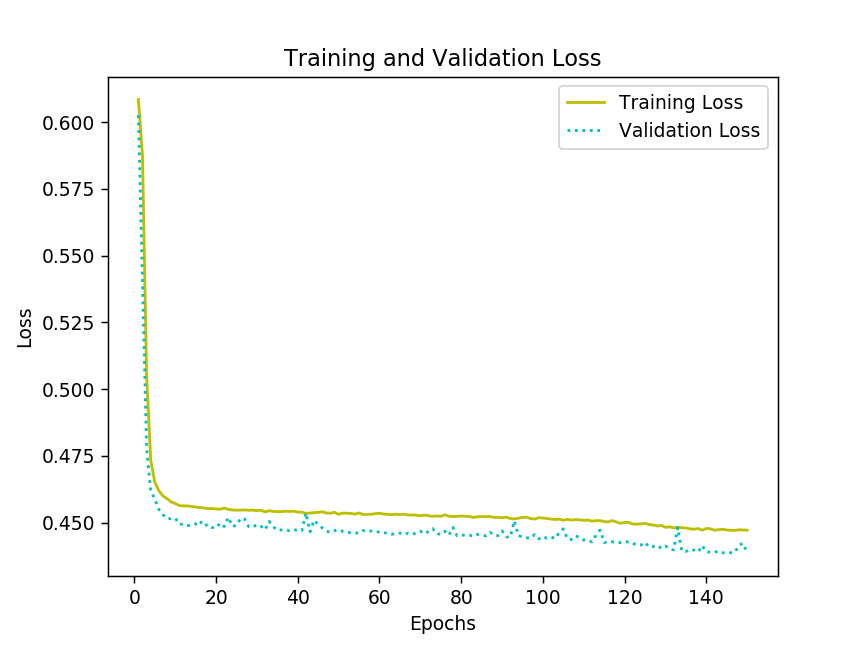

In [31]:
#plt.clf()
%matplotlib notebook
lossdeep = deephistory.history['loss']
val_lossdeep = deephistory.history['val_loss']
epochs = range(1, len(lossdeep) + 1)
plt.plot(epochs, lossdeep, 'y', label='Training Loss')
plt.plot(epochs, val_lossdeep, 'c', label='Validation Loss', linestyle=':')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plt.savefig('Figure_Val Loss - DeepNNs.png', dpi= 900)

In [27]:
#Confusion Matrix
Y_actual     = [np.argmax(y, axis=None, out=None) for y in Y_test]
Y_dpredicted = modelDNNs.predict_classes(X_test)
from pandas_ml import ConfusionMatrix
#from sklearn.metrics import confusion_matrix
cmdeep = ConfusionMatrix(Y_actual,Y_dpredicted)
cmdeep.print_stats()

C:\Users\Dariush_G3\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


Confusion Matrix:

Predicted     0  1     2  __all__
Actual                           
0           735  1   157      893
1           252  0   254      506
2           133  1  1110     1244
__all__    1120  2  1521     2643


Overall Statistics:

Accuracy: 0.6980703745743473
95% CI: (0.6801661634333948, 0.7155348322923721)
No Information Rate: ToDo
P-Value [Acc > NIR]: 9.342712077276625e-39
Kappa: 0.4845955173230326
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0            1         2
Population                                 2643         2643      2643
P: Condition positive                       893          506      1244
N: Condition negative                      1750         2137      1399
Test outcome positive                      1120            2      1521
Test outcome negative                      1523         2641      1122
TP: True Positive                           735            0      1110
TN: True Negative                 

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))
train_sizes, train_scores, test_scores =\ learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace( 0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

"\npipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))\ntrain_sizes, train_scores, test_scores =\\ learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace( 0.1, 1.0, 10), cv=10, n_jobs=1)\n\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\nplt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')\nplt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')\nplt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')\nplt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')\nplt.grid()\nplt.xlabel('Number of training samples')\nplt.ylabel('Accuracy')\nplt.legend(loc='lower right')\nplt.ylim([0.8, 1.0])\nplt.show() "

<IPython.core.display.Javascript object>


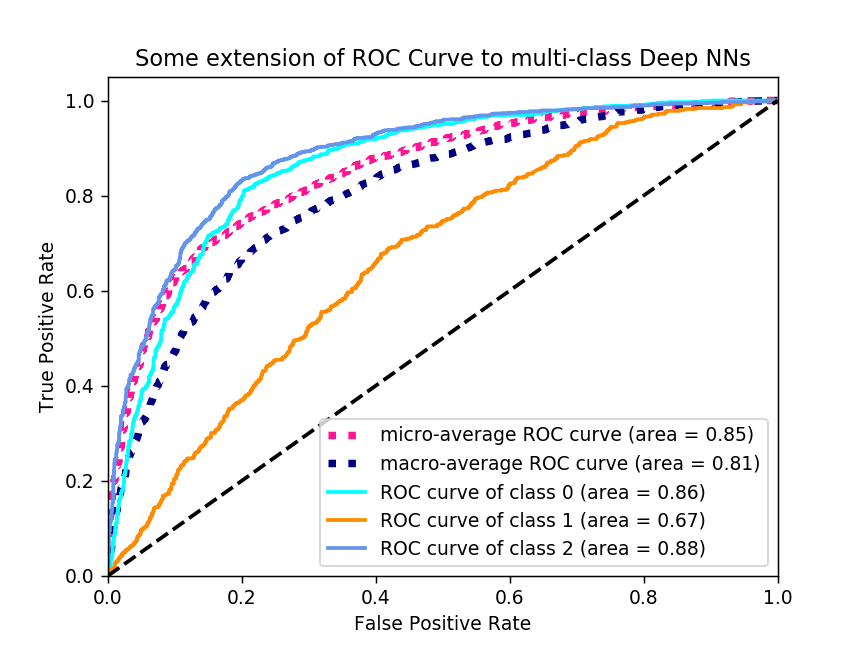

In [42]:
%matplotlib notebook
#plt.clf()
#ROC curves along with AUC values
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
data = pd.read_csv("edata.csv", delimiter=',')
X = data.iloc[:,3:].values
Y = data.iloc[:,:3].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)
y_test= Y_test
n_classes = Y.shape[1]
y_pred = modelDNNs.predict(X_test)#.ravel()
#y_pred = Y_dpredicted

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of ROC Curve to multi-class Deep NNs')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC Curve for modelDNNs.png', dpi= 900)


# DNNs Evaluated by 5-Fold Cross Validation on Dataset

In [8]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from pandas_ml import ConfusionMatrix

from sklearn.metrics import confusion_matrix
#--------------------------------------------------
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
#--------------------------------------------------
# load Engineered dataset (edata)
data = pd.read_csv("edata_Binary_Class.csv", delimiter=',')

# split into input (X) and output (Y) variables
X = data.iloc[1:,2:].values
Y = data.iloc[1:,:2].values
'''from sklearn.preprocessing import LabelEncoder
Status_le = LabelEncoder()
Y = Status_le.fit_transform(p_data['Status'])
print(Y[:9])
print(p_data['Status'].head())'''
#--------------------------------------------------
# define 5-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
k=5
kfold = KFold(n_splits=k, shuffle=True, random_state=seed)

DH = []
DNN = []
DNNcm = []
cvscores = []
for train, test in kfold.split(X, Y):
    #--------------------------------------------------
    # create model
    modelDNNs = Sequential()
    modelDNNs.add(Dense(X.shape[1]+3, input_dim=X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus'))
    modelDNNs.add(Dense(15, kernel_initializer= 'uniform' , activation= 'relu'))
    modelDNNs.add(Dense(10, kernel_initializer= 'uniform' , activation= 'relu'))
    modelDNNs.add(Dense(5,  kernel_initializer= 'uniform' , activation= 'sigmoid'))#sigmoid
    modelDNNs.add(Dense(2,  kernel_initializer= 'uniform' , activation= 'softmax'))
    modelDNNs.compile(optimizer= 'adam', loss= 'categorical_crossentropy' , metrics=['accuracy'])
    # Fit the model
    DNNs_Hist = modelDNNs.fit(X[train], Y[train], epochs=50, batch_size=10, verbose=0)
    DH.append(DNNs_Hist.history['acc'])
    # evaluate the model
    scores = modelDNNs.evaluate( X[test], Y[test], verbose=0 )
    print("%s: %.2f%%" % (modelDNNs.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    #-------------------------------
    # Confusion Matrix
    Y_actual = [np.argmax(y, axis=None, out=None) for y in Y[test]]#pd.DataFrame({'Y_actual':})
    Y_pred1  = modelDNNs.predict_classes(X[test])#pd.DataFrame({'Y_pred': })
    Y_pred   = Y_pred1.tolist()
    
    #saving output
    DNN.append(Y_pred)
    DNN.append(Y_actual)
    
    #Second Way
    confmat = confusion_matrix(Y_actual, Y_pred)
    DNNcm.append(confmat)
    #--------------------------------------------------
    
print("%.2f%% (+/- %.2f%%) " % (np.mean(cvscores), np.std(cvscores)))

acc: 77.48%
acc: 79.83%
acc: 77.48%
acc: 78.27%
acc: 80.20%
78.65% (+/- 1.16%) 


In [71]:
datum = {'K1_pred':DNN[0], 'K1_actu':DNN[1], 'K2_pred':DNN[2], 
         'K2_actu':DNN[3], 'K3_pred':DNN[4], 'K3_actu':DNN[5],
         'K4_pred':DNN[6], 'K4_actu':DNN[7], 'K5_pred':DNN[8], 'K5_actu':DNN[9]} 
BCPredMice = pd.DataFrame(datum)
'''a = {'Links' : lines ,'Titles' : titles , 'Singers': finalsingers , 'Albums':finalalbums , 'Years' : years}
df = pd.DataFrame.from_dict(a, orient='index')
df.transpose()'''

#Saving Model Output
import csv
BCPredMice.to_csv('BC_Predictions by Mice Imputation.csv', index=False, header=True)

BCPredMice.head(5)

,K1_pred,K1_actu,K2_pred,K2_actu,K3_pred,K3_actu,K4_pred,K4_actu,K5_pred,K5_actu
0,1,1,1,0,1,1,1,1,1,0
1,0,0,0,1,1,1,0,0,1,1
2,1,1,0,0,0,0,1,1,1,1
3,1,1,1,1,1,1,0,0,1,1
4,1,1,1,1,1,1,1,1,1,1


In [10]:
cm1 = ConfusionMatrix(BCPredMice.iloc[:,9], BCPredMice.iloc[:,8])
print(cm1)
cm1.print_stats()

Predicted  False  True  __all__
Actual                         
False        604   289      893
True         234  1515     1749
__all__      838  1804     2642
population: 2642
P: 1749
N: 893
PositiveTest: 1804
NegativeTest: 838
TP: 1515
TN: 604
FP: 289
FN: 234
TPR: 0.8662092624356775
TNR: 0.6763717805151176
PPV: 0.8398004434589801
NPV: 0.720763723150358
FPR: 0.3236282194848824
FDR: 0.16019955654101994
FNR: 0.13379073756432247
ACC: 0.8020439061317184
F1_score: 0.8528004503236701
MCC: 0.5514993111144727
informedness: 0.5425810429507951
markedness: 0.5605641666093382
prevalence: 0.661998485995458
LRP: 2.6765566482874052
LRN: 0.19780650437903968
DOR: 13.531186230148169
FOR: 0.27923627684964203


##### Kfold CV_ROC Curve

In [72]:
import matplotlib. pyplot as plt
import numpy as np
from scipy import interp

from sklearn. cross_validation import KFold
from sklearn. metrics import roc_curve, auc

<IPython.core.display.Javascript object>


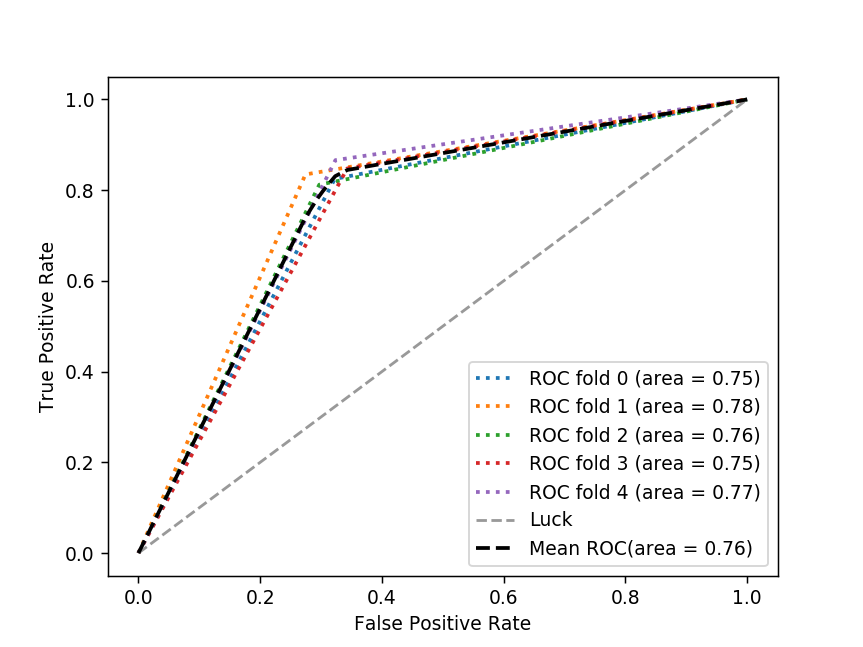

C:\Users\Dariush_G3\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


"plt. plot(base_fpr,  mean_tprs, 'b' )\nplt. fill_between(base_fpr,  tprs_lower,  tprs_upper,  color='grey' ,  alpha=0.3)\nplt. plot([ 0, 1], [ 0, 1], 'r--' )\nplt. xlim([-0.01, 1.01])\nplt. ylim([-0.01, 1.01])\nplt. ylabel('True Positive Rate' )\nplt. xlabel('False Positive Rate' )\nplt. axes(). set_aspect('equal' , 'datalim' )\nplt. show()"

In [7]:
%matplotlib notebook

BCPredMice = pd.read_csv("BC_Predictions by Mice Imputation.csv", delimiter=',')

tprs = []
base_fpr = np.linspace(0, 1, 100)
#plt. figure(figsize=(5, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = [ ]

for i in range(5):
    fpr, tpr, thresholds = roc_curve(BCPredMice.iloc[:,2*i+1], BCPredMice.iloc[:,2*i])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, linestyle=':', linewidth=2, label= 'ROC fold %d (area = %0.2f)' % (i, roc_auc) )

plt.plot([0,1], [0,1], '--', color=(0.6, 0.6, 0.6), label='Luck')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

''' 
    tpr = interp(base_fpr,  fpr,  tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
    
tprs = np.array(tprs)
mean_tprs = tprs. mean(axis=0)'''

plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC(area = %0.2f)' % mean_auc, lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example' )
plt.legend(loc="lower right")
plt.show()

'''plt. plot(base_fpr,  mean_tprs, 'b' )
plt. fill_between(base_fpr,  tprs_lower,  tprs_upper,  color='grey' ,  alpha=0.3)
plt. plot([ 0, 1], [ 0, 1], 'r--' )
plt. xlim([-0.01, 1.01])
plt. ylim([-0.01, 1.01])
plt. ylabel('True Positive Rate' )
plt. xlabel('False Positive Rate' )
plt. axes(). set_aspect('equal' , 'datalim' )
plt. show()'''

<IPython.core.display.Javascript object>


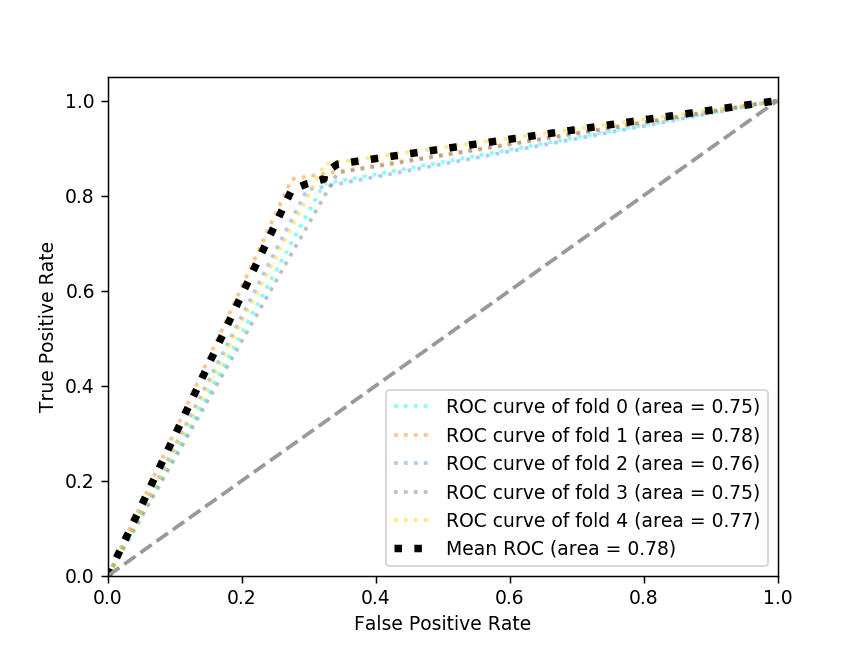

In [9]:
%matplotlib notebook

BCPredMice = pd.read_csv("BC_Predictions by Mice Imputation.csv", delimiter=',')

from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], thresholds = roc_curve(BCPredMice.iloc[:,2*i+1], BCPredMice.iloc[:,2*i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))
all_tpr = np.unique(np.concatenate([tpr[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 5


colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'gray', 'gold'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, linestyle=':',
             label='ROC curve of fold {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]), alpha=0.5)    

plt.plot(all_fpr, all_tpr, color='black', linestyle=':', linewidth=4,
        label='Mean ROC (area = %0.2f)' % auc(all_fpr, all_tpr))#color='deeppink', linestyle=':'
    
plt.plot([0, 1], [0, 1], 'k--', lw=2, color=(0.6, 0.6, 0.6))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of ROC Curve to Deep NNs by 5-fold CV')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC Curve DNNs by MICE 5-fold CV.png', dpi= 900)

### Dropout

In [54]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn .model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#--------------------------------------------------

seed = 7
np.random.seed(seed)
#--------------------------------------------------
data = pd.read_csv("edata_Binary_Class.csv", delimiter=',')
X = data.iloc[1:,2:].values
Y = data.iloc[1:,:2].values

def creat_model():
    dropmodel = Sequential()
    dropmodel.add(Dropout(0.2,input_shape=(16,)))
    dropmodel.add(Dense(16, kernel_initializer= 'uniform' , activation= 'relu', W_constraint=maxnorm(5)))
    dropmodel.add(Dropout(0.2))
    dropmodel.add(Dense(10, kernel_initializer= 'uniform' , activation= 'relu', W_constraint=maxnorm(5)))
    dropmodel.add(Dense(5,  kernel_initializer= 'uniform' , activation= 'sigmoid', W_constraint=maxnorm(5)))
    dropmodel.add(Dense(2,  kernel_initializer= 'uniform' , activation= 'softmax'))
    # compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    dropmodel.compile(optimizer=sgd, loss= 'categorical_crossentropy', metrics=['accuracy'])
    return dropmodel

np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=creat_model, epochs=25, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%) " % (results.mean()*100, results.std()*100))



C:\Users\Dariush_G3\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="uniform", activation="relu", kernel_constraint=<keras.con...)`
C:\Users\Dariush_G3\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform", activation="relu", kernel_constraint=<keras.con...)`
C:\Users\Dariush_G3\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, kernel_initializer="uniform", activation="sigmoid", kernel_constraint=<keras.con...)`
C:\Users\Dariush_G3\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="uniform", activation="relu", kernel_constraint=<keras.con...)`
C:\Users\Dariush_G3\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update 

Visible: 79.24% (1.05%) 


In [55]:
results

array([0.77819833, 0.80696442, 0.78917487, 0.78576836, 0.8016654 ])

## 2. Imputed with Zero

In [90]:

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import random

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load Engineered dataset (edata)
dataz = pd.read_csv("edata-nonimputed.csv", delimiter=',')

# split into input (X) and output (Y) variables

Xz = dataz.iloc[1:,2:].values
Yz = dataz.iloc[1:,:2].values

k=5
BCkfold = KFold(n_splits=k, shuffle=True, random_state=seed)

BCDH = []
BCDNN = []
BCcvscores = []

for train, test in BCkfold.split(Xz, Yz):
    #--------------------------------------------------
    # create model
    BCDNNs = Sequential()
    BCDNNs.add(Dense(Xz.shape[1]+3, input_dim=Xz.shape[1], kernel_initializer= 'uniform' , activation= 'softplus'))
    BCDNNs.add(Dense(15, kernel_initializer= 'uniform' , activation= 'relu'))
    BCDNNs.add(Dense(10, kernel_initializer= 'uniform' , activation= 'relu'))
    BCDNNs.add(Dense(5,  kernel_initializer= 'uniform' , activation= 'sigmoid'))
    BCDNNs.add(Dense(2,  kernel_initializer= 'uniform' , activation= 'softmax'))
    BCDNNs.compile(optimizer= 'adam', loss= 'categorical_crossentropy' , metrics=['accuracy'])
    
    BCDNNs_Hist = BCDNNs.fit(Xz[train], Yz[train], epochs=50, batch_size=10, verbose=0)
    BCDH.append(BCDNNs_Hist.history['acc'])
    
    # evaluate the model
    BCscores = BCDNNs.evaluate( Xz[test], Yz[test], verbose=0 )
    
    print("%s: %.2f%%" % (BCDNNs.metrics_names[1], BCscores[1]*100))
    BCcvscores.append(BCscores[1] * 100)
    
    #-------------------------------
    # Confusion Matrix
    Yz_actual = [np.argmax(y, axis=None, out=None) for y in Yz[test]]
    Yz_pred1  = BCDNNs.predict_classes(Xz[test])
    Yz_pred   = Yz_pred1.tolist()
    
    #saving output
    BCDNN.append(Yz_pred)
    BCDNN.append(Yz_actual)
    #--------------------------------------------------
    
print("%.2f%% (+/- %.2f%%) " % (np.mean(BCcvscores), np.std(BCcvscores)))

acc: 76.12%
acc: 77.37%
acc: 75.02%
acc: 77.25%
acc: 76.72%
76.50% (+/- 0.86%) 


In [91]:
BCdatum = {'K1_pred':BCDNN[0], 'K1_actu':BCDNN[1], 'K2_pred':BCDNN[2], 
           'K2_actu':BCDNN[3], 'K3_pred':BCDNN[4], 'K3_actu':BCDNN[5],
           'K4_pred':BCDNN[6], 'K4_actu':BCDNN[7], 'K5_pred':BCDNN[8], 'K5_actu':BCDNN[9]} 
BCPred = pd.DataFrame(BCdatum)

import csv
BCPred.to_csv('BC_Predictions by Zero Imputation.csv', index=False, header=True)

BCPred.head(5)

,K1_pred,K1_actu,K2_pred,K2_actu,K3_pred,K3_actu,K4_pred,K4_actu,K5_pred,K5_actu
0,1,1,1,0,1,1,1,1,1,0
1,1,0,1,1,1,1,1,0,1,1
2,1,1,1,0,1,0,1,1,1,1
3,1,1,1,1,1,1,1,0,1,1
4,1,1,1,1,1,1,1,1,1,1


In [92]:
cm11 = ConfusionMatrix(BCPred.iloc[:,9], BCPred.iloc[:,8])
print(cm11)
cm11.print_stats()

Predicted  False  True  __all__
Actual                         
False        507   386      893
True         229  1520     1749
__all__      736  1906     2642
population: 2642
P: 1749
N: 893
PositiveTest: 1906
NegativeTest: 736
TP: 1520
TN: 507
FP: 386
FN: 229
TPR: 0.8690680388793597
TNR: 0.5677491601343785
PPV: 0.7974816369359916
NPV: 0.688858695652174
FPR: 0.4322508398656215
FDR: 0.2025183630640084
FNR: 0.13093196112064037
ACC: 0.767221801665405
F1_score: 0.8317373461012312
MCC: 0.4609141154798498
informedness: 0.43681719901373817
markedness: 0.48634033258816567
prevalence: 0.661998485995458
LRP: 2.010564141759762
LRN: 0.23061586051426403
DOR: 8.718238794488313
FOR: 0.3111413043478261


<IPython.core.display.Javascript object>


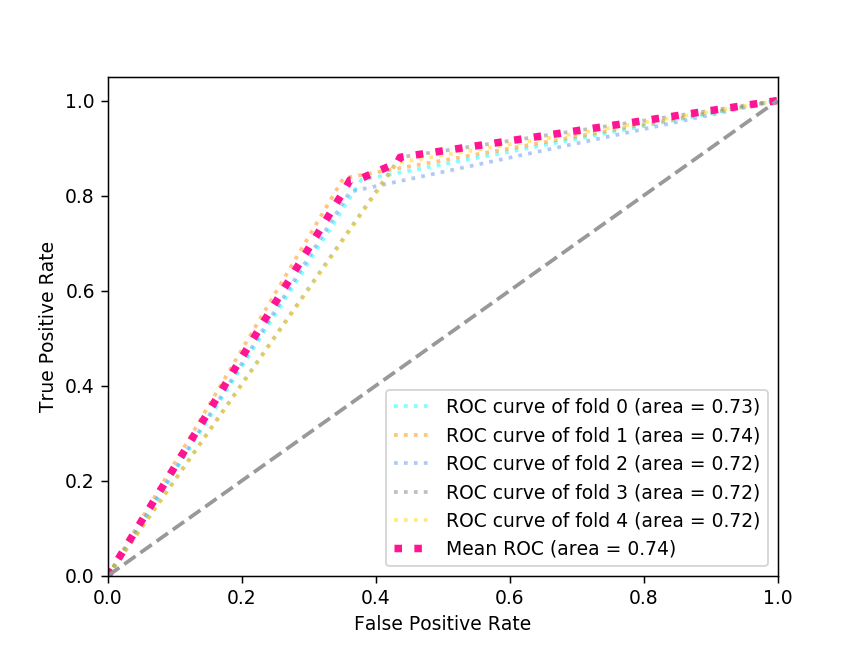

In [4]:
%matplotlib notebook
#plt.clf()

import numpy as np
from scipy import interp
import matplotlib. pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_curve, auc
from itertools import cycle

BCPred = pd.read_csv("BC_Predictions by Zero Imputation.csv", delimiter=',')

fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(5):
    fpr2[i], tpr2[i], thresholds = roc_curve(BCPred.iloc[:,2*i+1], BCPred.iloc[:,2*i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
    
all_fpr_BC = np.unique(np.concatenate([fpr2[i] for i in range(5)]))
all_tpr_BC = np.unique(np.concatenate([tpr2[i] for i in range(5)]))

# Then interpolate all ROC curves at this points
mean_tpr_BC = np.zeros_like(all_fpr_BC)
for i in range(5):
    mean_tpr_BC += interp(all_fpr_BC, fpr2[i], tpr2[i])

# Finally average it and compute AUC
mean_tpr_BC /= 5


colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'gray', 'gold'])
for i, color in zip(range(5), colors):
    plt.plot(fpr2[i], tpr2[i], color=color, lw=2, linestyle=':',
             label='ROC curve of fold {0} (area = {1:0.2f})'
             ''.format(i, roc_auc2[i]), alpha=0.5)    

plt.plot(all_fpr_BC, all_tpr_BC, color='deeppink', linestyle=':', linewidth=4,
        label='Mean ROC (area = %0.2f)' % auc(all_fpr_BC, all_tpr_BC))#color='deeppink', linestyle=':'
    
plt.plot([0, 1], [0, 1], 'k--', lw=2, color=(0.6, 0.6, 0.6))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve to Zero Imputed Deep NNs by 5-fold CV')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC Curve DNNs by 5-fold CV_ Zero Imputation.png', dpi= 900)

<IPython.core.display.Javascript object>


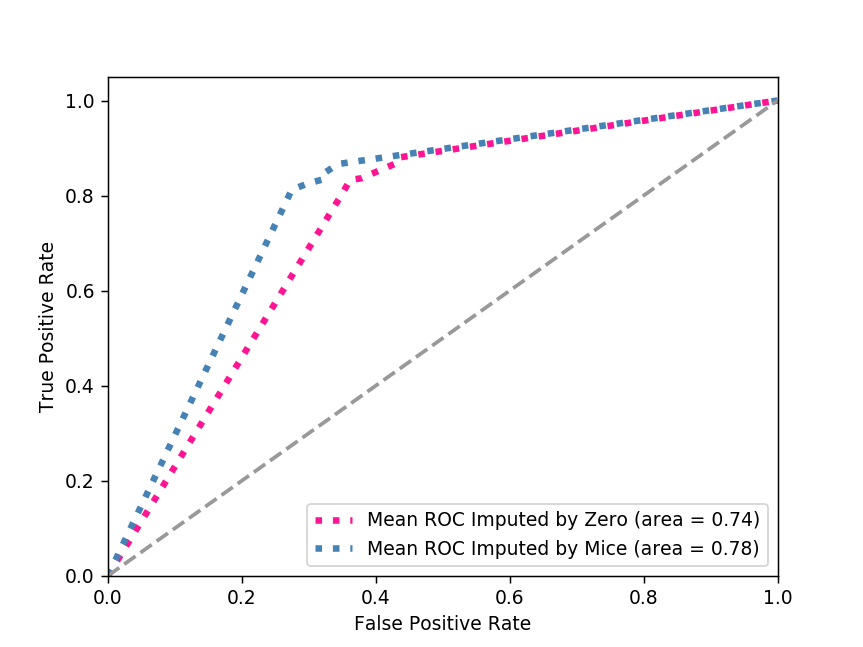

In [23]:
%matplotlib notebook
plt.clf()

import numpy as np
from scipy import interp
import matplotlib. pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_curve, auc
from itertools import cycle

plt.plot(all_fpr_BC, all_tpr_BC, color='deeppink', linestyle=':', linewidth=3.5,
        label='Mean ROC Imputed by Zero (area = %0.2f)' % auc(all_fpr_BC, all_tpr_BC))#color='deeppink', linestyle=':'

plt.plot(all_fpr, all_tpr, color='steelblue', linestyle=':', linewidth=3.5,
        label='Mean ROC Imputed by Mice (area = %0.2f)' % auc(all_fpr, all_tpr)) #linestyle=':'

plt.plot([0, 1], [0, 1], 'k--', lw=2, color=(0.6, 0.6, 0.6))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve to Zero Imputed Deep NNs vs Mice by 5-fold CV')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC Curve DNNs by 5-fold CV_ Zero vs Mice Imputation.png', dpi= 900)

# Feature Importance

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

dataframe = pd.io.parsers.read_csv("Diabetes_HbA1c&FBS.csv", delimiter=',', encoding='latin-1', low_memory=False)

dataframe.loc[(dataframe['HbA1c'] <  5.7) , 'D.Status'] = 'Normal'
dataframe.loc[(dataframe['HbA1c'] >= 5.7) , 'D.Status'] = 'Risky'
dataframe['D.Status'].value_counts()
#dataframe.head(9)

Risky     8052
Normal    4281
Name: D.Status, dtype: int64

In [25]:
array = dataframe.values
X = array[:,[5,9,41,42,43,44,46,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71]]
Y = array[:,8]
Y = np.asarray(Y, dtype="|S6")
df = dataframe.iloc[:,[5,9,41,42,43,44,46,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71]]

feat_labels = list(['Gender', 'Age', 'Calcium', 'TC', 'Creatinine',
                    'ESR', 'Ferritin', 'HDL', 'Hb', 'HCT', 'LDL', 
                    'MCH', 'MCHC', 'MCV', 'Microalbumin', 'PH', 'Phosphor',
                    'Phospoatase', 'Platelet', 'RBC', 'SGOT', 'SGPT',
                    'T3', 'T4', 'TIBC', 'TG', 'TSH', 'UREA', 'Uric Acid', 'WBC'])#df.columns.values #df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X, Y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))


 1) Age                            0.137398
 2) TG                             0.099582
 3) TC                             0.082811
 4) LDL                            0.069603
 5) HDL                            0.065306
 6) Creatinine                     0.055563
 7) UREA                           0.050550
 8) TSH                            0.042373
 9) SGOT                           0.033541
10) SGPT                           0.033140
11) PH                             0.030769
12) T4                             0.027108
13) Phospoatase                    0.025098
14) ESR                            0.024643
15) Uric Acid                      0.019415
16) MCV                            0.016951
17) WBC                            0.016401
18) RBC                            0.015883
19) MCH                            0.015674
20) Platelet                       0.015565
21) HCT                            0.015171
22) MCHC                           0.015157
23) Gender                      

In [26]:
#feat_lab[indices]
features=[]
for f in range(X.shape[1]):
    var = feat_labels[indices[f]]
    features.append(var)
    #print(feat_labels[indices[f]])
    
importances
feat_labels
np.round(importances[indices],3)

imp = importances[indices]
dff = pd.DataFrame({'importance': imp}, index=features)
dff

,importance
Age,0.137398
TG,0.099582
TC,0.082811
LDL,0.069603
HDL,0.065306
Creatinine,0.055563
UREA,0.050550
TSH,0.042373
SGOT,0.033541
SGPT,0.033140


<IPython.core.display.Javascript object>


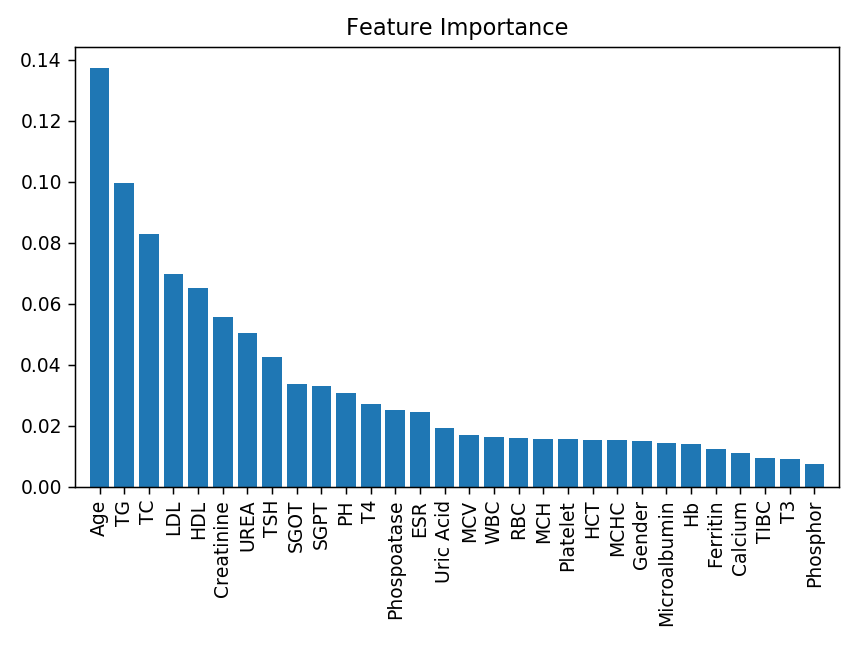

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()
#plt.savefig('myfig.png', dpi= 900)

<IPython.core.display.Javascript object>


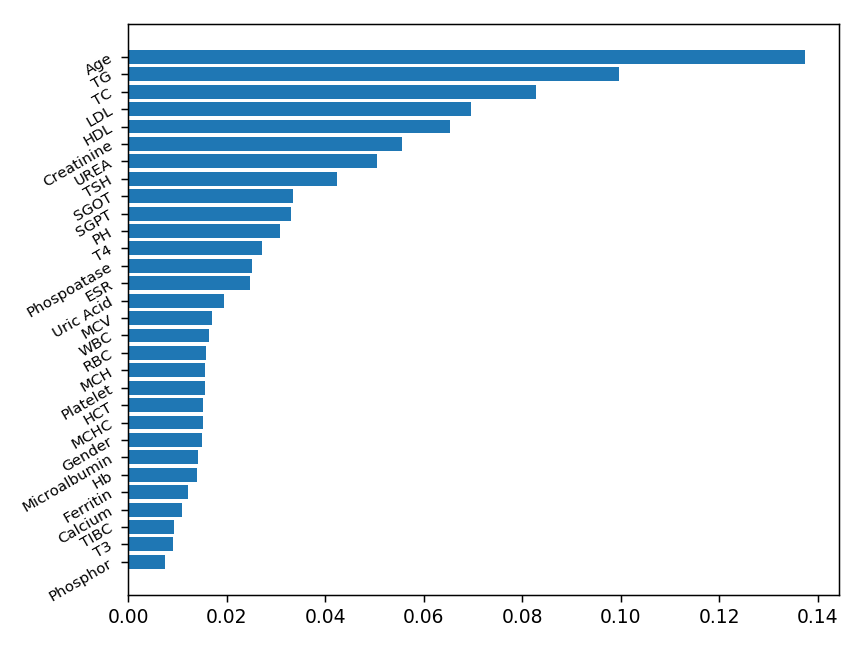

In [29]:
# sorting and reversing features and their importance
imp2 = np.sort(imp)
imp2 = np.sort(imp)
imp2
#features2 = features.reverse()
features2 = features[::-1]
features2
#---------------
%matplotlib notebook
import matplotlib.pyplot as plt
index = np.arange(len(features2))


plt.barh(features2, imp2, height=.8, align='center')#steelblue, gold, lime, lightcoral, palevioletred, lightseagreen
#plt.xlabel('Importance', fontsize=10)
#plt.ylabel('Variable', fontsize=5)
#plt.title('Variable Importance' )
plt.yticks(index, features2, fontsize=8, rotation=30)
plt.tight_layout()
plt.show()
plt.savefig('Feature Importance by Random Forest.png', dpi= 900)

### Logistic Regression

In [70]:
# load Engineered dataset (edata)

data = pd.read_csv("edata_Binary_Class.csv", delimiter=',')
p_data = pd.io.parsers.read_csv("Prepared Data Anonymized.csv", delimiter=',', encoding='utf-8', low_memory=False) 

#--------------------
p_data.loc[(p_data['HbA1c'] <  5.7) , 'Status'] = '0'
p_data.loc[(p_data['HbA1c'] >= 5.7) , 'Status'] = '1'
data['Status'] = p_data['Status']
p_data.head()
p_data['Status'].value_counts()

#--------------------
# split into input (X) and output (Y) variables
X = data.iloc[:,2:-1].values
Y = data.iloc[:,-1].values
#--------------------
from sklearn.model_selection import train_test_split
# create training and testing var
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)
#--------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pandas import set_option

set_option('precision',3)

LR = LogisticRegression(penalty='l1', C=1.0)
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)

report = classification_report(Y_test, Y_pred)
print(report)

print('Training Accuracy: %.4f' % LR.score(X_train, Y_train))
print('Test Accuracy: %.4f' %     LR.score(X_test,  Y_test))
#--------------------


[[ 595  298]
 [ 237 1513]]
             precision    recall  f1-score   support

          0       0.72      0.67      0.69       893
          1       0.84      0.86      0.85      1750

avg / total       0.79      0.80      0.80      2643

Training Accuracy: 0.7867
Test Accuracy: 0.7976


In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)


from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

# Comaring Records before and after 2015

### I: Family Medicine=No

In [120]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix

#--------------------------------------------------
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
#--------------------------------------------------
data = pd.read_csv("edata_Binary_Class.csv", delimiter=',')
data = data0[data0.FamilyMedicine_No==1]
data = data.drop(columns=['FamilyMedicine_No', 'FamilyMedicine_Yes'])
#data0[(data0.Insurance_Rural==1) & (data0.Status_Normal==0)].shape

# split into input (X) and output (Y) variables
X = data.iloc[1:,2:].values
Y = data.iloc[1:,:2].values

from sklearn.model_selection import train_test_split
# create training and testing var
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

modelDNNs = Sequential()
modelDNNs.add(Dense(X.shape[1]+3, input_dim=X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus'))
modelDNNs.add(Dense(15, kernel_initializer= 'uniform' , activation= 'relu'))
modelDNNs.add(Dense(10, kernel_initializer= 'uniform' , activation= 'relu'))
modelDNNs.add(Dense(5,  kernel_initializer= 'uniform' , activation= 'sigmoid'))#sigmoid
modelDNNs.add(Dense(2,  kernel_initializer= 'uniform' , activation= 'softmax'))
modelDNNs.compile(optimizer= 'adam', loss= 'categorical_crossentropy' , metrics=['accuracy'])#binary_crossentropy
# Fit the model
DNNs_Hist = modelDNNs.fit(X, Y, validation_data =(X_test, Y_test), epochs=20, batch_size=10, verbose=0)

In [113]:
acc=DNNs_Hist.history['val_acc']#np.mean('val_acc')]
print("Accuracy is:%.2f%% " % (round(np.mean(acc)*100,2)))
DNNs_Hist.history
Y_actual  = [np.argmax(y, axis=None, out=None) for y in Y_test]
predicted = modelDNNs.predict_classes(X_test)
from pandas_ml import ConfusionMatrix
DNNscm = ConfusionMatrix(Y_actual, predicted)
print(DNNscm)
DNNscm.print_stats()

Accuracy is:77.76% 
Predicted  False  True  __all__
Actual                         
False        224   110      334
True          85   605      690
__all__      309   715     1024
population: 1024
P: 690
N: 334
PositiveTest: 715
NegativeTest: 309
TP: 605
TN: 224
FP: 110
FN: 85
TPR: 0.8768115942028986
TNR: 0.6706586826347305
PPV: 0.8461538461538461
NPV: 0.7249190938511327
FPR: 0.32934131736526945
FDR: 0.15384615384615385
FNR: 0.12318840579710146
ACC: 0.8095703125
F1_score: 0.8612099644128114
MCC: 0.5591470831176754
informedness: 0.5474702768376289
markedness: 0.5710729400049788
prevalence: 0.673828125
LRP: 2.6623188405797102
LRN: 0.18368271221532093
DOR: 14.494117647058824
FOR: 0.2750809061488673


### I: Family Medicine=Yes

In [121]:
data = pd.read_csv("edata_Binary_Class.csv", delimiter=',')
data = data0[data0.FamilyMedicine_Yes==1]
data = data.drop(columns=['FamilyMedicine_No'])

# split into input (X) and output (Y) variables
X = data.iloc[1:,2:].values
Y = data.iloc[1:,:2].values

from sklearn.model_selection import train_test_split
# create training and testing var
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

# Building the model
modelDNNs2 = Sequential()
modelDNNs2.add(Dense(X.shape[1]+3, input_dim=X.shape[1], kernel_initializer= 'uniform' , activation= 'softplus'))
modelDNNs2.add(Dense(15, kernel_initializer= 'uniform' , activation= 'relu'))
modelDNNs2.add(Dense(10, kernel_initializer= 'uniform' , activation= 'relu'))
modelDNNs2.add(Dense(5,  kernel_initializer= 'uniform' , activation= 'sigmoid'))
modelDNNs2.add(Dense(2,  kernel_initializer= 'uniform' , activation= 'softmax'))
# Compile the model
modelDNNs2.compile(optimizer= 'adam', loss= 'categorical_crossentropy' , metrics=['accuracy'])
# Fit the model
DNNs_Hist2 = modelDNNs2.fit(X, Y, validation_data =(X_test, Y_test), epochs=20, batch_size=10, verbose=0)


Acc=DNNs_Hist2.history['val_acc']#np.mean('val_acc')]
print("Accuracy is:%.2f%% " % (round(np.mean(Acc)*100,2)))

Accuracy is:75.89% 


In [123]:
Y_actual  = [np.argmax(y, axis=None, out=None) for y in Y_test]
predicted = modelDNNs2.predict_classes(X_test)

from pandas_ml import ConfusionMatrix
DNNscm2 = ConfusionMatrix(Y_actual, predicted)
print(DNNscm2)
DNNscm2.print_stats()

Predicted  False  True  __all__
Actual                         
False        360   189      549
True         183   886     1069
__all__      543  1075     1618
population: 1618
P: 1069
N: 549
PositiveTest: 1075
NegativeTest: 543
TP: 886
TN: 360
FP: 189
FN: 183
TPR: 0.8288119738072965
TNR: 0.6557377049180327
PPV: 0.8241860465116279
NPV: 0.6629834254143646
FPR: 0.3442622950819672
FDR: 0.1758139534883721
FNR: 0.17118802619270346
ACC: 0.7700865265760197
F1_score: 0.8264925373134329
MCC: 0.48585780955597296
informedness: 0.48454967872532917
markedness: 0.48716947192599247
prevalence: 0.6606922126081582
LRP: 2.4075014477259566
LRN: 0.2610617399438728
DOR: 9.221962008847255
FOR: 0.3370165745856354


In [114]:
X.shape[1]

14